<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность  Δ  = 3;
- дисперсия  𝜎2  = 225;
- уровень доверия  𝛽  = 0.95.
</div>    

In [39]:
sigma = 15  
Z = 1.96  #ТУТ Я НЕ ПОНЯЛА, ОТКУДА ВЗЯЛОСЬ 1,96, если квантиль 95%? Как это посчитали?
Delta = 3
N = ((sigma*Z)/Delta)**2
N

96.03999999999998

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 12$.
</div>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt

n = 25
x = 130
sigma = 12

#1-a/2 = 0.99 #объясните, пожалуйста, зачем мы делим альфу на 2 и вычитаем результат из 1?
Za  = 2.33 #как вы нашли это число?
Delta = (sigma/sqrt(n))*Za
Interval_1 = x-Delta
Interval_2 = x+Delta
Interval_1,Interval_2


(124.408, 135.592)

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [7]:
import scipy.stats as stats

population_men  = stats.norm.rvs(scale=171, loc=19, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(scale=165, loc=16, size=12000)  # Выборка женщин со средним ростом 165

stats.ttest_ind(population_men, population_women)
#Гипотеза: различие незначительно
#p-value>0,5, следовательно гипотезу не отвергаем, разница статистически не значима.

Ttest_indResult(statistic=0.486589649959442, pvalue=0.6265491693778154)

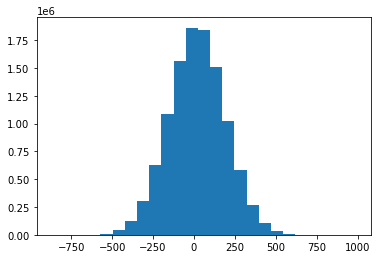

In [37]:
plt.hist(population_men, bins=25); 
#Налолжить один график на другой мне не удалось, тк и у меня одна гистограмма получилась более, чем в 10 раз меньше другой.


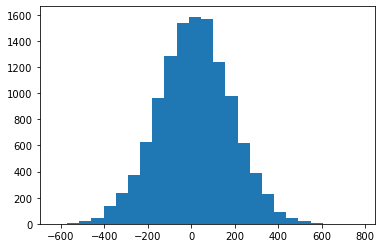

In [38]:
plt.hist(population_women, bins=25);

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [41]:
sigma = 150  
Z = 1.96  
Delta = 50
N = ((sigma*Z)/Delta)**2
N

34.5744

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [42]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

Ответ волшебника  Реальность
Дождь                 10          15
Солнце                39          34

In [6]:
import scipy.stats as stats

oddsratio, pvalue = stats.fisher_exact([[10,15],[39,34]])

oddsratio, pvalue #поскольку p<0,05, разница между значениями статистически значима. Значит маг делает свои предсказания
#интуитивно, а не руководствуясь реальными сверхъестественными способностями. Поясните, пожалуйста, что такое oddsratio?

(0.5811965811965812, 0.35417955365927367)

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [15]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]


def mean_confidence_interval(data, confidence=0.9):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

mean_confidence_interval(data)

(6.628571428571429, 6.07363110319857, 7.183511753944288)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [25]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

t, p =stats.ttest_ind(data_1, data_2, equal_var = False)
t,p #на основе того, что p-value сильно больше 0,05, говорим, что разница между выборками статистически не значима.
#А как вы делали так, что у вас выводилась такая строка? Ttest_indResult(statistic=2.929306138816564, pvalue=0.003400545578247028)
#Почему тут только два значения?

(7.068404675178226, 2.4974180382616264e-09)

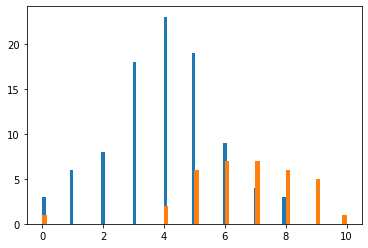

In [17]:
plt.hist(data_2, bins=70);
plt.hist(data_1, bins=70);

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

 Если получаемая при помощи того или иного теста вероятность ошибки Р оказывается меньше некоторого заранее принятого уровня значимости (например, 0.05), нулевая гипотеза отклоняется. То есть в нашем случае отвергаем нулевую гипотезу и считаем распределение ненормальным.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [20]:
np.random.seed(11)
A = stats.norm.rvs(scale=50,loc=10,size=300)
B = A+stats.norm.rvs(scale=10,loc=-7.5,size=300)

A_B = np.concatenate((A,B))
A_B.mean()

# Подсказка, обратите внимание на Two-sample T-test

6.195653565192412

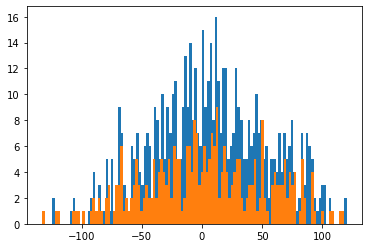

In [21]:
plt.hist(A_B, bins=120);
plt.hist(B, bins=120); #Визуально выборки действительно отличаются не очень сильно, обе нормально распределены.
#при p-value<0,05 выборки бы сильно отличались. 